<a href="https://colab.research.google.com/github/BachokunIAR/pytorch-deep-learning/blob/main/pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Importing libraries

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


#1.2 Getting a dataset

In [2]:
train_data = torchvision.datasets.FashionMNIST(root= 'sample_data' , # to download the data to
                                               train = True,# whether you want a training or test data
                                               #transform = transforms.PILToTensor(),
                                               #transform= None,
                                               transform=ToTensor(),
                                               target_transform= None,
                                               download = True # do you want the data downloaded?
                                               )


test_data = torchvision.datasets.FashionMNIST(root = 'sample_data',
                                              train = False,
                                              download= True,
                                              target_transform= None,
                                              #transform= None
                                              transform=ToTensor()
                                              )

100%|██████████| 26421880/26421880 [00:01<00:00, 16913456.30it/s]


Extracting sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266269.65it/s]


Extracting sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5044023.23it/s]


Extracting sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11709477.76it/s]

Extracting sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data) # checking the length of training and testing data

(60000, 10000)

In [4]:
image , label = train_data[3]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1294, 0.3765, 0.6863, 0.6118, 0.2510, 0.0549, 0.2118, 0.5373,
           0.8000, 0.7608, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2863, 0.7294,
           0.6941, 0.7176, 0.6863, 0.7373, 0.9098, 1.0000, 0.8745, 0.8588,
           0.7608, 0.7020, 0.7294, 0.8353, 0.5725, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.6392, 0.5490,
           0.5882, 0.5961, 0.5882, 0.5725, 0.6863, 0.6863, 0.6784, 0.6706,
           0.6118, 0.5961, 0.5804, 0.5059, 0.6118, 0.5490, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882, 0.5569, 0.5490,
           0.5961, 0.6275, 0.6118, 0.5725, 0.5569, 0.4980, 0.5294, 0.5216,
           0.5490, 0.5490, 0.5373, 0.5216, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# shape of the image
image.shape

torch.Size([1, 28, 28])

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# checking the shape of the image
print(f'Image shape: {image.shape} -> [color_channels,height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height, width]
Image label: Dress


#1.3 Visualizing the image

Image shape: <built-in method size of Tensor object at 0x79354f243060>


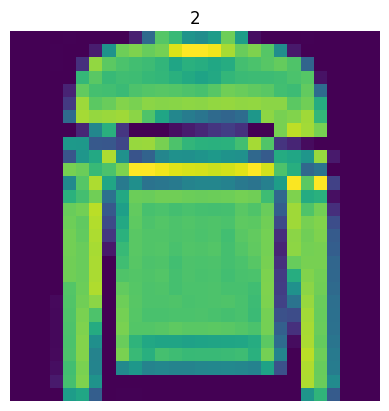

In [10]:
import matplotlib.pyplot as plt # exploring to see more images
image, label = train_data[5]
print(f"Image shape: {image.size}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);
plt.axis(False);

Image shape: <built-in method size of Tensor object at 0x79354d17c040>


(-0.5, 27.5, 27.5, -0.5)

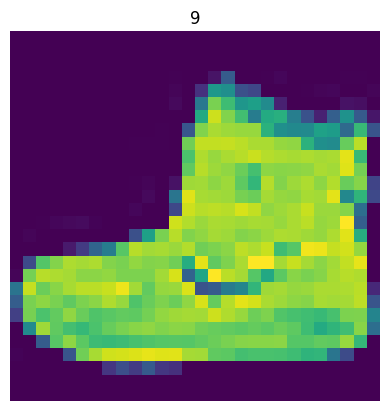

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.size}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);
plt.axis(False)

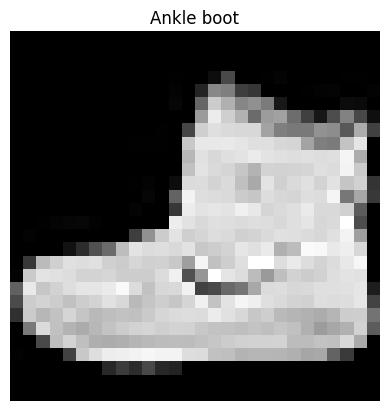

In [12]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);

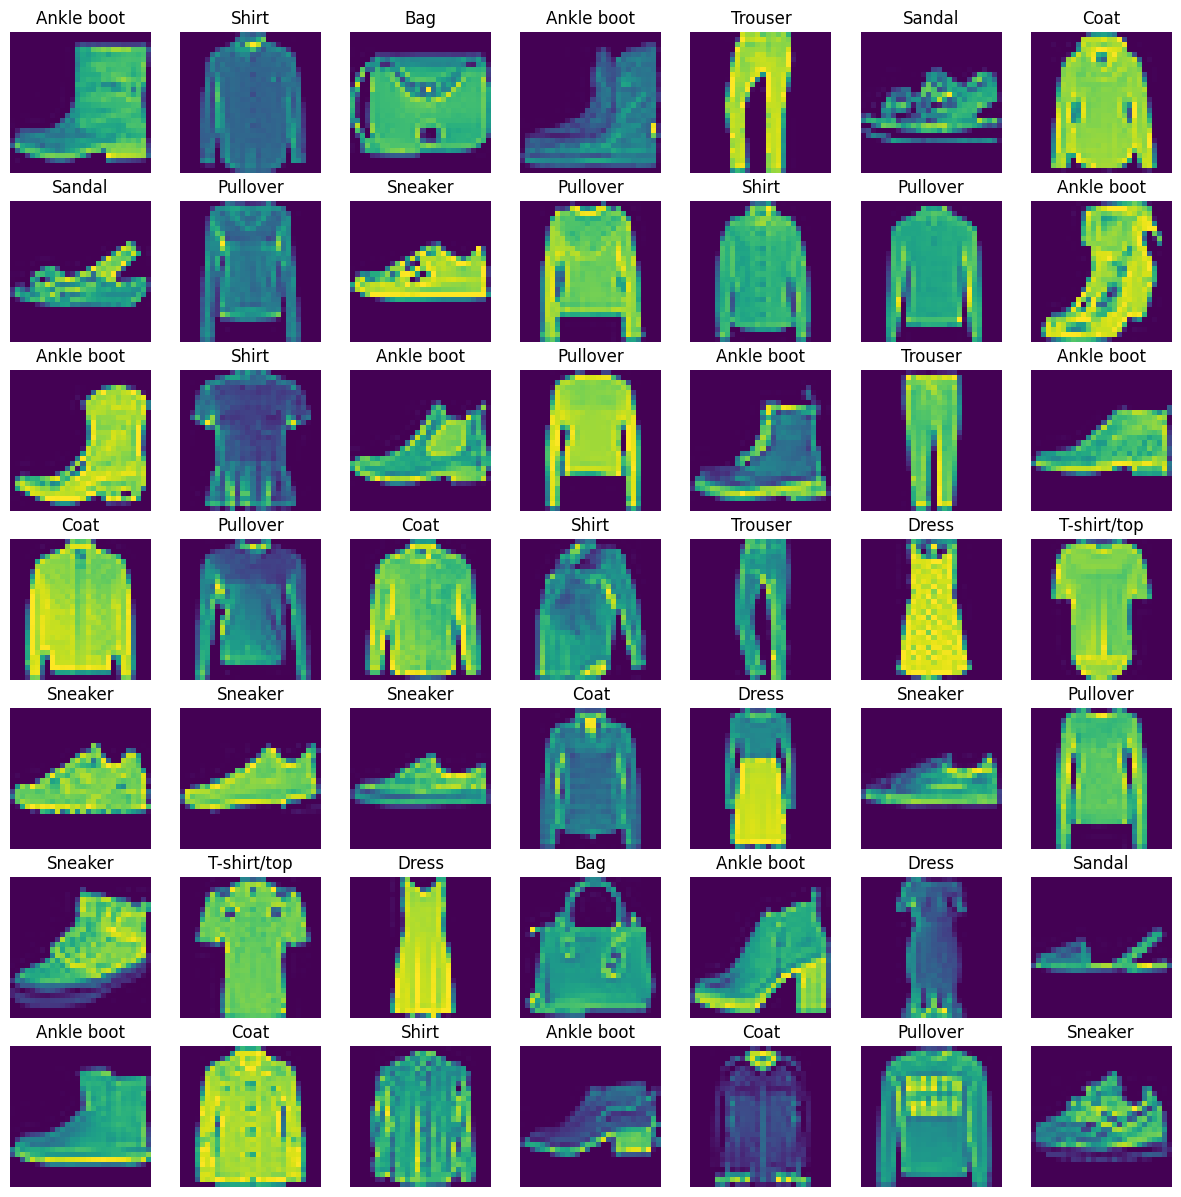

In [13]:
from torch.random import manual_seed
# viewing more images
torch.manual_seed(42)
fig  = plt.figure(figsize =(15,15))
rows,cols =7,7

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size =[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze())#,cmap = 'gray')
  plt.title(class_names[label])
  plt.axis('off')

# 2. Data Preparation

In [14]:
#=============================
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
#================================================



BATCH_SIZE = 32 # setting batch size

# Turn datasets into iterable (batches)

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE, # number of samples per batch
                              shuffle = True # shuffle data after every epoch

                              )

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False # the model will nnot see the test data during training so no need to shuffle
                             )
# chhecking on the data


print(f' Dataloder : {train_dataloader, test_dataloader}')
print(f'Length of train dataloder : {len(train_dataloader)} batchs of {BATCH_SIZE}')

print(f' Length of test dataloder : {len(test_dataloader)} batches of {BATCH_SIZE}')

 Dataloder : (<torch.utils.data.dataloader.DataLoader object at 0x793548ce1000>, <torch.utils.data.dataloader.DataLoader object at 0x793548cc7670>)
Length of train dataloder : 1875 batchs of 32
 Length of test dataloder : 313 batches of 32


In [15]:
# # Check out what's inside the training dat
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

Image size : torch.Size([1, 28, 28])
 Label : 1, label size : torch.Size([])


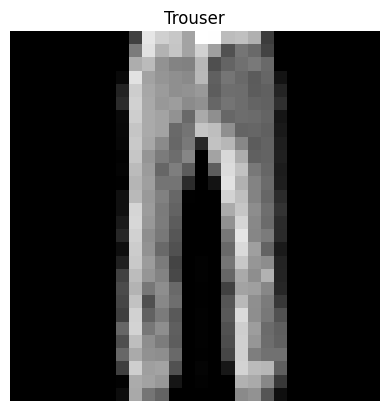

In [17]:
#showing one target

torch.manual_seed(42)
random_idx = torch.randint( len(train_features_batch), size =(1,)).item()
img  , label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap = 'gray')
plt.title(class_names[label])

plt.axis(False)

print(f'Image size : {img.shape}')
print(f' Label : {label}, label size : {label.shape}')

# 3 Building Model (Model_AB) : control model


In [18]:
flatten_model= nn.Flatten()

# take a single sample
x = train_features_batch[3]

# FLATTEN THE SAMPLE

output  = flatten_model(x) # perforrm forward pass
# print out the result
print(f' shape before flattening : {x.shape} -> [color_channels, height, width]')
print(f' shape after flattening : {output.shape} -> [color_channels, heaight* width]')

 shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
 shape after flattening : torch.Size([1, 784]) -> [color_channels, heaight* width]


## Creating the model


In [19]:

from torch import nn

class FashionMNISTModelAB0(nn.Module):
  def __init__(self,input_shape: int, hidden_units : int, output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #  nn inputs should be in vector form
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

setting up the parameters

In [20]:
# setting up input with input parameters
torch.manual_seed(42)

model_AB0 = FashionMNISTModelAB0(input_shape= 784, # (28 x28)
            hidden_units=10, # number of units in the hiddenlayer
             output_shape = len(class_names) # one for each class
)

model_AB0.to('cpu') # model will be kept in cpu

FashionMNISTModelAB0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# 3.1 setting up Loss functions, optimization and evaluation

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
from helper_functions import accuracy_fn

# setting up loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_AB0.parameters(),
                            lr  = 0.1)

## 3.2 Creating a function for timing our experiments

In [23]:
from timeit import default_timer as Timer
def print_train_time(start : float, end: float, device: torch.device= None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """

  time_spent = end -start
  print(f'Train time on {device} : {time_spent :.3f} seconds')
  return time_spent



# 3.3 Creating a training loop and training a model on batches of data

In [24]:
from tqdm.auto import tqdm

#===set the seed and start the timer==============
torch.manual_seed(42)
train_time_start_on_cpu = Timer()

#===Set the number of epochs (we'll keep this small for faster training times)=======
epochs = 3

#==========creating the training abd testing loop==============
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epochs}\n==============')
  # Training
  train_loss = 0
# Add a loop to loop through training batches
  for batch,(x,y) in enumerate(train_dataloader):
    model_AB0.train()
  #=====1. forward pass
    y_pred = model_AB0(x)

  #====2 Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulatively add up the loss per epoch
  # 3 optimzer zero grad
    optimizer.zero_grad()
  #4=======Loss backward ==
    loss.backward()

  # 5 optimizer steps
    optimizer.step()

    if batch % 400 == 0:
      print(f' Look at {batch * len(x)}/{len(train_dataloader.dataset)} samples')
#==Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

#===Testing
# Setup variables for accumulatively adding up loss and accuracy
  test_loss , test_acc = 0,0
  model_AB0.eval()

  with torch.inference_mode():
    for x,y in test_dataloader:
      test_pred = model_AB0(x)
# 2. Calculate loss (accumatively)
      test_loss += loss_fn(test_pred,y)# accumulatively add up the loss per epoch
# 3. Calculate accuracy (preds need to be same as y_true)
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim = 1))
# Calculations on test metrics need to happen inside torch.inference_mode()
# Divide total test loss by length of test dataloader (per batch)

    test_loss /= len(test_dataloader)
      # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)
    print(print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n"))

train_time_end_on_cpu = Timer()
total_train_time_model_AB0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_AB0.parameters()).device))










  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 3
 Look at 0/60000 samples
 Look at 12800/60000 samples
 Look at 25600/60000 samples
 Look at 38400/60000 samples
 Look at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

None
Epoch : 3
 Look at 0/60000 samples
 Look at 12800/60000 samples
 Look at 25600/60000 samples
 Look at 38400/60000 samples
 Look at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

None
Epoch : 3
 Look at 0/60000 samples
 Look at 12800/60000 samples
 Look at 25600/60000 samples
 Look at 38400/60000 samples
 Look at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

None
Train time on cpu : 23.516 seconds


# 4. Making prediction and get model AB0 results

In [25]:
from torch.utils import data
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      y_pred = model(x)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y,
                            y_pred = y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,# only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc' : acc}
model_AB0_results = eval_model(model = model_AB0, data_loader= test_dataloader,
                               loss_fn=loss_fn, accuracy_fn= accuracy_fn)

model_AB0_results

{'model_name': 'FashionMNISTModelAB0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic-code (for using a GPU if there is any)

In [26]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'


6. Model AB1: Building a better model with non-linearity

In [27]:
# Create a model with non-linear and linear layers
class FashionMNISTModelVAB1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)
model_AB1 = FashionMNISTModelVAB1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_AB1.parameters()).device # check model device

device(type='cpu')


# 6.1 Setup loss, optimizer and evaluation metrics

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_AB1.parameters(),
                            lr = 0.1)

# 6.2 Functionizing training and test loops

In [30]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (x, y) in enumerate(data_loader):
    # Send data to GPU

    x, y = x.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(x)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))

    # 3 . Optimizer zero grad

    optimizer.zero_grad()
    # 4. Loss backward

    loss.backward()

    # 5 optimizer step

    optimizer.step()

     # Calculate loss and accuracy per epoch and print out what's happening

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f'Train loss: {train_loss:.3f} | Train accuracy : {train_acc:.3f} %')


  # Fucntion for test step

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
 # Turn on inference context manager
  with torch.inference_mode():
    for x, y in data_loader:
      x,y = x.to(device), y.to(device) # to GPU
      # 1. Forward pass
      test_pred = model(x)
      # 2. Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true= y,
                              y_pred = test_pred.argmax(dim=1)) # from logit to predicting labels
   # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f' Test loss : {test_loss:.5f} | Test accuracy : {test_acc:.3f}%\n')




In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_AB1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_AB1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_AB1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.092 | Train accuracy : 61.343 %
 Test loss : 0.95636 | Test accuracy : 64.996%

Epoch: 1
---------
Train loss: 0.781 | Train accuracy : 71.928 %
 Test loss : 0.72227 | Test accuracy : 73.912%

Epoch: 2
---------
Train loss: 0.670 | Train accuracy : 75.937 %
 Test loss : 0.68500 | Test accuracy : 75.020%

Train time on cpu : 24.329 seconds


In [32]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device=device):

  """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

  loss , acc = 0,0
  model.eval()

  with torch.inference_mode():
    for x, y in data_loader:

      x,y = x.to(device),y.to(device)

      y_pred = model(x)
      loss += loss_fn(y_pred,y)

      acc += accuracy_fn(y_true= y,
                         y_pred = y_pred.argmax(dim=1))
      # Scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model_name ': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc}
   # Calculate model 1 results with device-agnostic code

model_AB1_results = eval_model(model= model_AB1,
                              data_loader =test_dataloader,
                              loss_fn = loss_fn,
                              accuracy_fn = accuracy_fn,
                              device = device)

model_AB1_results


{'model_name ': 'FashionMNISTModelVAB1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [33]:
# first model

model_AB0_results

{'model_name': 'FashionMNISTModelAB0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 7. Model AB2: Building a Convolutional Neural Network (CNN)

In [34]:
# Create a convolutional neural network
class FashionMNISTModelVAB2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_AB2 = FashionMNISTModelVAB2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_AB2

FashionMNISTModelVAB2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

# 7.1 Stepping through nn.Conv2d()

In [35]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [36]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [37]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [38]:
# changed the values of conv_layer
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [39]:
# check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [40]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


# 7.2 Stepping through nn.MaxPool2d()
making data through nn.MaxPool2d()

In [41]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


##7.3 Setting up loss function and optimizer for model_AB2

In [42]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_AB2.parameters(),
                            lr = 0.1)

# 7.4 Training and Testing model_AB2

In [43]:
torch.manual_seed(42)

from timeit import default_timer as Timer
train_time_start_model_AB2 = Timer()

# Train and testing the model
epoch = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch :{epoch}\=============')
  train_step(data_loader = train_dataloader,
             model = model_AB2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(data_loader =test_dataloader,
            model = model_AB2,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_AB2 = timer()
total_train_time_model_AB2 = print_train_time(start = train_time_start_model_AB2,
                                              end= train_time_end_model_AB2,
                                              device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0\=============
Train loss: 0.587 | Train accuracy : 78.742 %
 Test loss : 0.39255 | Test accuracy : 86.042%

Epoch :1\=============
Train loss: 0.362 | Train accuracy : 86.893 %
 Test loss : 0.35723 | Test accuracy : 86.701%

Epoch :2\=============
Train loss: 0.325 | Train accuracy : 88.217 %
 Test loss : 0.32124 | Test accuracy : 88.019%

Train time on cpu : 106.201 seconds


In [44]:
model_AB2_results = eval_model(
    model = model_AB2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_AB2_results

{'model_name ': 'FashionMNISTModelVAB2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [45]:
model_AB0_results

{'model_name': 'FashionMNISTModelAB0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [46]:
model_AB1_results

{'model_name ': 'FashionMNISTModelVAB1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# 8 Comparing the performance of the 3 models

In [47]:
import pandas as pd
results_compare = pd.DataFrame([model_AB0_results,
                                model_AB1_results,
                                model_AB2_results])
results_compare

,model_name,model_loss,model_acc,model_name
0,FashionMNISTModelAB0,0.476639,83.426518,NaN
1,NaN,0.685001,75.019968,FashionMNISTModelVAB1
2,NaN,0.321237,88.019169,FashionMNISTModelVAB2


In [48]:
# Add training times to results comparison

results_compare["train_time"] = [total_train_time_model_AB0,
                                    total_train_time_model_AB1,
                                    total_train_time_model_AB2]
results_compare

,model_name,model_loss,model_acc,model_name,train_time
0,FashionMNISTModelAB0,0.476639,83.426518,NaN,23.516195
1,NaN,0.685001,75.019968,FashionMNISTModelVAB1,24.329345
2,NaN,0.321237,88.019169,FashionMNISTModelVAB2,106.200849


# <font color =blue> 9 . Making and evaluate random predictions with the best model (model_AB2)

In [49]:
#def make_predictions(model: torch.nn.Module, data:list,device:torch.device=device):
def make_predictions(model: torch.nn.Module, data:list,device:torch.device=device):
  prediction_probs1 = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # preparing sample
      sample = torch.unsqueeze(sample,dim=0).to(device) # Add an extra dimension and send sample to device
      prediction_logits = model(sample) # forward pass
      prediction_probs = torch.softmax(prediction_logits.squeeze(),dim=0) # softmax is perfom on the logits dimension only
      prediction_probs1.append(prediction_probs.cpu())

  return torch.stack(prediction_probs1)




In [77]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=16):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [78]:
# making predictions with model_AB2 the most performed model
prediction_probs1 = make_predictions(model = model_AB2,
                                    data = test_samples,
                                    #device = device
                                    ).to(device=device)
prediction_probs1[:2]

tensor([[1.2219e-04, 6.2970e-06, 1.7841e-04, 1.1811e-03, 4.2206e-07, 9.9428e-01,
         2.2337e-05, 1.2274e-03, 2.9730e-03, 4.4175e-06],
        [7.0459e-02, 1.3755e-03, 4.7229e-01, 1.4772e-02, 1.3378e-03, 4.1089e-04,
         4.3120e-01, 1.6030e-04, 7.8193e-03, 1.7200e-04]])

In [79]:
from numpy.core.fromnumeric import argmax
prediction_class= prediction_probs1.argmax(dim=1)
prediction_class

tensor([5, 2, 0, 1, 2, 2, 1, 4, 4, 5, 6, 6, 6, 3, 1, 4])

In [53]:
test_labels, prediction_class

([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 4],
 tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 3]))

# Visualizing the predisted images

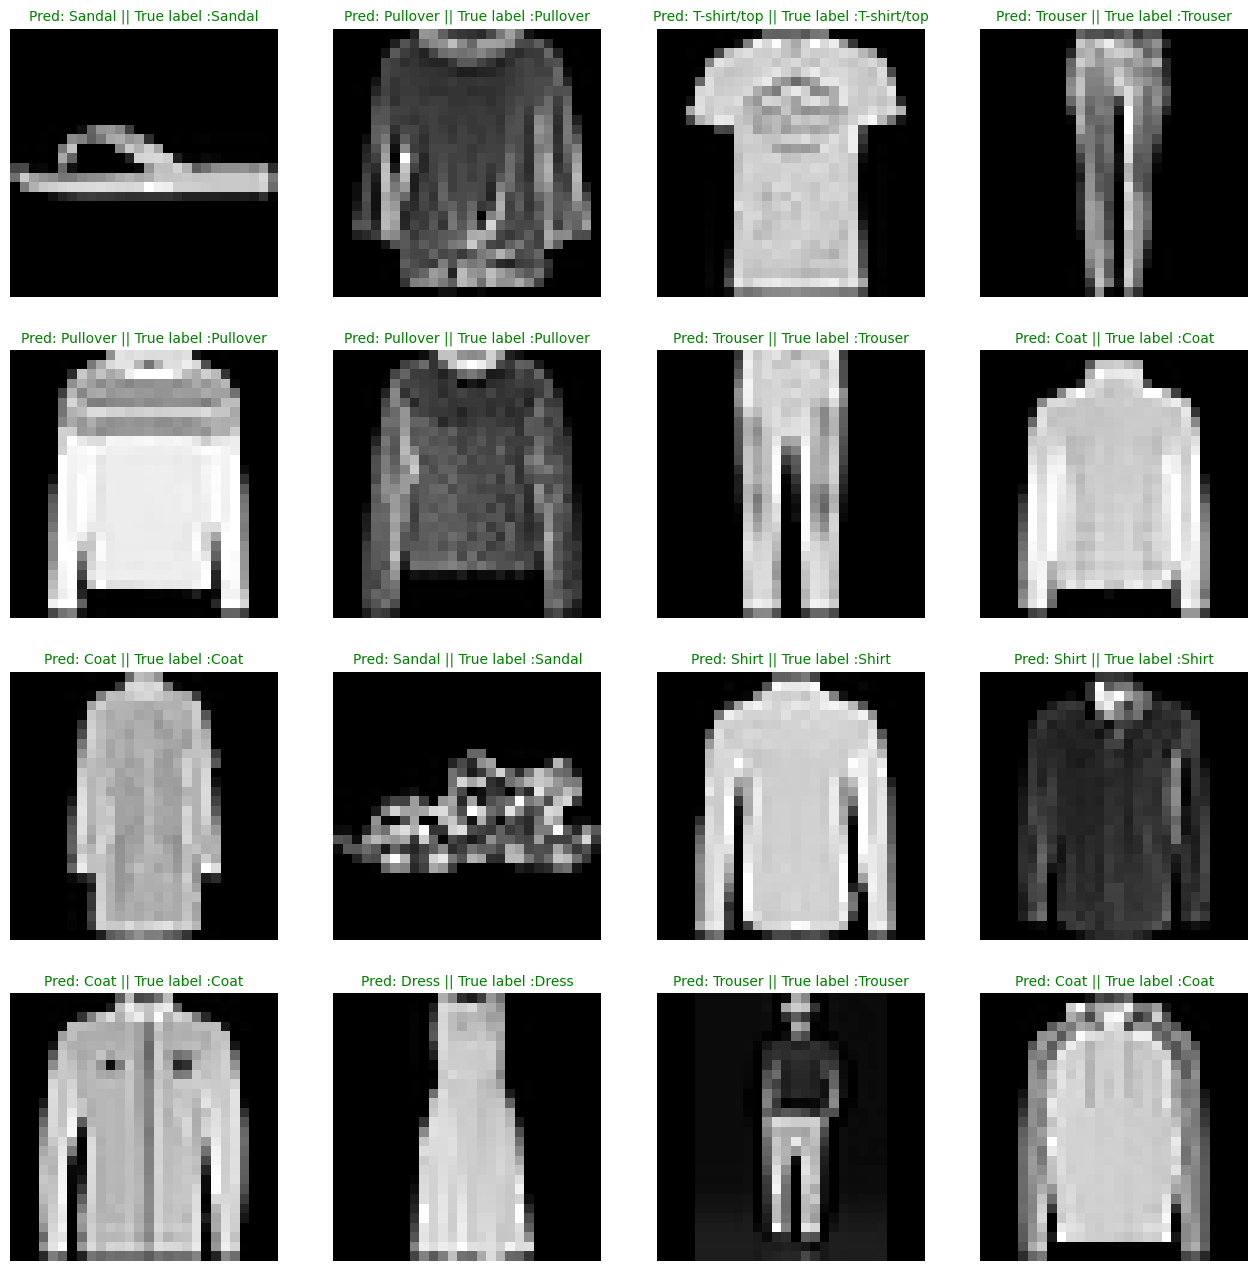

In [80]:
plt.figure(figsize=(16,16))

nrows = 4
ncols = 4

for i, sample in enumerate(test_samples):
  # Creating -f subplots
  plt.subplot(nrows, ncols,i+1)
  # plotting the targeted images
  plt.imshow(sample.squeeze(),cmap='gray')
  prediction_labels = class_names[test_labels[i]] # labels of the predicted images

  true_label = class_names[test_labels[i]] # getting the true label of the images

  # Title of plots
  title_text = f"Pred: {prediction_labels} || True label :{true_label}"

  if prediction_labels == true_label:
    plt.title(title_text, fontsize = 10, c='g') # green color

  else:
    plt.title(title_text, fontsize = 10, c='r')

  plt.axis(False);

# 10. Confusion matrix for prediction evaluation

In [64]:
from tqdm.auto import tqdm
y_preds = []
model_AB2.eval()

with torch.inference_mode():
  for x, y in tqdm(test_dataloader, desc='Making predictions'):
    x,y = x.to(device), y.to(device)

    y_logit = model_AB2(x)
     # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit,dim=0).argmax(dim=1)# note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # putting predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [65]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.9 MB/s eta 0:00:00
mlxtend version: 0.23.0


To get higher version of mlxtend

In [ ]:
# import mlxtend

# print(mlxtend.__version__)
# assert int(mlxtend.__version__.split(".")[1])>= 19 # should be version 0.19.0 or higher

In [67]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


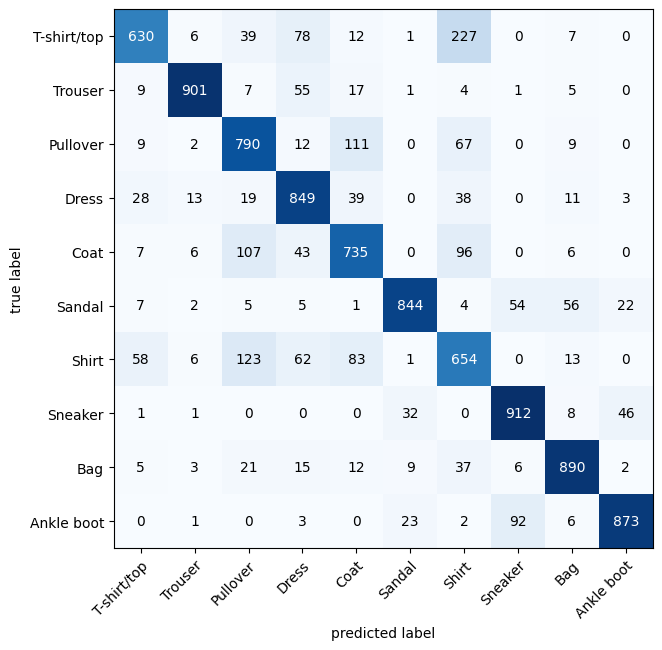

In [69]:
confusion_mat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confusion_mat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# <font color=red> 11. Save and load best performing model

In [81]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_AB2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_AB2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)








Saving model to: models/03_pytorch_computer_vision_model_AB2.pth


In [82]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_AB2 = FashionMNISTModelVAB2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_AB2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_AB2.to(device)

In [84]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_AB2_results = eval_model(
    model=loaded_model_AB2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_AB2_results

{'model_name ': 'FashionMNISTModelVAB2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [86]:
model_AB2_results

{'model_name ': 'FashionMNISTModelVAB2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [87]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_AB2_results["model_loss"]),
              torch.tensor(loaded_model_AB2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

# <font color = 'green'>Making prediction with model_AB0

In [74]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (Pullover)


In [75]:
prediction_probs1 = make_predictions(model = model_AB0,
                                    data = test_samples,
                                    #device = device
                                    ).to(device=device)
prediction_probs1[:2]

tensor([[2.2723e-01, 1.8217e-02, 4.0885e-01, 8.4395e-02, 8.5435e-02, 5.2916e-03,
         1.2704e-01, 6.7753e-04, 4.2800e-02, 7.0814e-05],
        [4.3427e-04, 4.0029e-05, 2.9952e-02, 5.9572e-04, 9.5932e-01, 3.3181e-10,
         8.0538e-03, 4.1897e-11, 1.6007e-03, 3.7646e-12]])

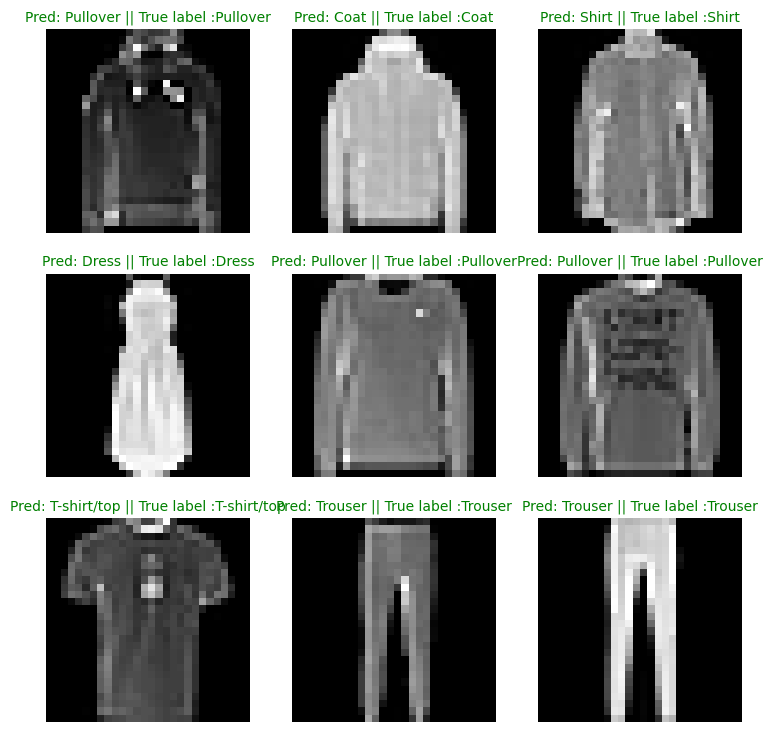

In [76]:
plt.figure(figsize=(9,9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Creating -f subplots
  plt.subplot(nrows, ncols,i+1)
  # plotting the targeted images
  plt.imshow(sample.squeeze(),cmap='gray')
  prediction_labels = class_names[test_labels[i]] # labels of the predicted images

  true_label = class_names[test_labels[i]] # getting the true label of the images

  # Title of plots
  title_text = f"Pred: {prediction_labels} || True label :{true_label}"

  if prediction_labels == true_label:
    plt.title(title_text, fontsize = 10, c='g') # green color

  else:
    plt.title(title_text, fontsize = 10, c='r')

  plt.axis(False);